# History Embedding

> Embed an environment into a more complex representation of state/observation-action histories

In [75]:
#| default_exp Environments/HistoryEmbedding

In [76]:
#| hide
# Imports for the nbdev development environment
# from nbdev.showdoc import *
from fastcore.test import *

In [77]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Examples

In [78]:
#|eval: true notest
import numpy as np
import matplotlib.pyplot as plt
import copy

from pyCRLD.Environments.SocialDilemma import SocialDilemma
from pyCRLD.Environments.EcologicalPublicGood import EcologicalPublicGood

from pyCRLD.Agents.StrategyActorCritic import stratAC
from pyCRLD.Agents.POStrategyActorCritic import POstratAC

from pyCRLD.Utils import FlowPlot as fp

np.random.seed(42)

In [79]:
from pyCRLD.Environments.HistoryEmbedding import HistoryEmbedded

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


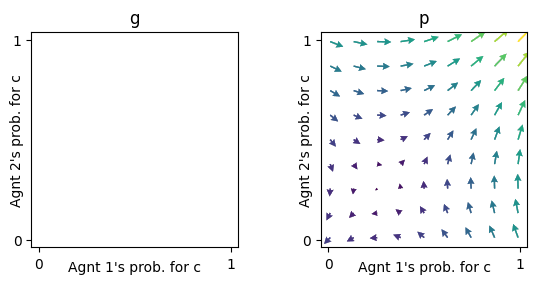

In [88]:
ecopg = EcologicalPublicGood(N=2, f=1.2, c=5, m=-5, qc=0.2, qr=0.1)
ecopg.Sset

mae_basic_ecopg = stratAC(env=ecopg, learning_rates=0.1, discount_factors=0.9)


x = ([0], [0,1], [0])
y = ([1], [0,1], [0])
ax = fp.plot_strategy_flow(mae_basic_ecopg, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=np.array(mae_basic_ecopg.env.Oset)[0, [0,1]])



In [81]:
def generate_observation_tensor_for_only_action_information(state_set, observation_set):
    # Initialize the tensor
    tensor = np.zeros((2, len(state_set), len(observation_set)), dtype=int)
    
    # Generate the tensor
    for i in range(2):
        for j, state in enumerate(state_set):
            for k, observation in enumerate(observation_set):
                if observation in state:
                    tensor[i, j, k] = 1
    return tensor



### Memory-one Ecological Public Good

What is the effect of condition actions also on the past actions in the ecological public goods envrionment?

In [82]:
ecopg_with_history = HistoryEmbedded(ecopg, h=(1,1,1))
print("S-set", ecopg_with_history.Sset)
print("O-set", ecopg_with_history.Oset)
print("obs. tensor \n", ecopg_with_history.O)

ecopg_with_history_state_only = copy.deepcopy(ecopg_with_history)
ecopg_with_history_state_only.O = generate_observation_tensor_for_only_state_information(ecopg_with_history.Oset[0], ecopg.Sset)

print("obs. tensor modified \n", ecopg_with_history_state_only.O)

ecopg_with_history_state_only.Oset = [['g|', 'p|'],['g|', 'p|']]

print("O-set modified", ecopg_with_history_state_only.Oset)
print("observations", ecopg_with_history_state_only.observations())


# ecopg_with_history_state_only.ObservationTensor = lambda: generate_observation_tensor_for_only_state_information(ecopg_with_history.Oset[0], ecopg.Sset)


S-set ['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|']
O-set [['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|'], ['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|']]
obs. tensor 
 [[[1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]

 [[1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]]
obs. tensor modified 
 [[[1 0]
  [0 1]
  [1 0]
  [0 1]
  [1 0]
  [0 1]
  [1 0]
  [0 1]]

 [[1 0]
  [0 1]
  [1 0]
  [0 1]
  [1 0]
  [0 1]
  [1 0]
  [0 1]]]
O-set modified [['g|', 'p|'], ['g|', 'p|']]
observations [['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd

Visualizing the flow of learning in the prosperous state:

['c,c,g|' 'c,d,p|' 'd,c,p|' 'd,d,p|']
[['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|'], ['c,c,g|', 'c,c,p|', 'c,d,g|', 'c,d,p|', 'd,c,g|', 'd,c,p|', 'd,d,g|', 'd,d,p|']]


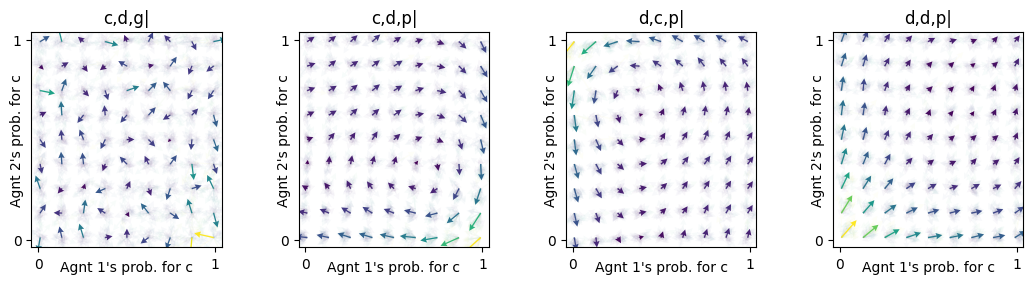

In [87]:
mae1 = stratAC(env=ecopg_with_history, learning_rates=0.1, discount_factors=0.9)
x = ([0], [2,3,5,7], [0])
y = ([1], [2,3,5,7], [0])
ax = fp.plot_strategy_flow(mae1, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=np.array(mae1.env.Oset)[[0],[2,3,5,7]])

print(np.array(mae1.env.Oset)[[0],[0,3,5,7]])
print(mae1.env.Oset)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


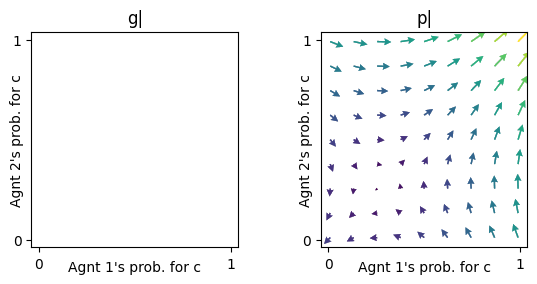

In [86]:
mae_modified_tensor = POstratAC(env=ecopg_with_history_state_only, learning_rates=0.1, discount_factors=0.9)


x = ([0], [0,1], [0])
y = ([1], [0,1], [0])
ax = fp.plot_strategy_flow(mae_modified_tensor, x, y, flowarrow_points=np.linspace(0.01 ,0.99, 9), NrRandom=32,
                           conds=np.array(mae_modified_tensor.env.Oset)[0, [0,1]])



This flow has similarites to the flow of the memory-1 Prisoner's Dilemma above, yet with more tendency toward cooperation. This is expected, since the ecological public good without memory-1 has also more tendency towards cooperation.

In [ ]:
#| hide
# import nbdev; nbdev.nbdev_export()

Partial